In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))

import modules.io as io
import modules.vessel_regression as vessel_regression
import numpy as np
import skimage.filters as filters
import skimage.feature as feature
import matplotlib.pyplot as plt

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = "../config/googlenet_zoom_c30_train300k_aug10_clean.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

2it [00:00, 16.15it/s]

centering images


7860it [04:23, 29.87it/s]
100%|██████████| 31252/31252 [07:10<00:00, 72.62it/s]


In [4]:
X = data[0]
C = data[1]
N = X.shape[0]
print(X.shape)
print(C[150])

(31252, 160, 160)
(array([0.38344606, 0.37851559, 0.39613648, 0.43356783, 0.47460363,
       0.51247431, 0.50608642, 0.47579719, 0.44481213, 0.4239408 ,
       0.44049639, 0.47913199, 0.52900956, 0.55867437, 0.58971683,
       0.63704469, 0.63399472, 0.65908311, 0.64061033, 0.59700453,
       0.55882896, 0.49440789, 0.45224389, 0.42247461, 0.41278329,
       0.42715404, 0.44793162, 0.4780147 , 0.52559232, 0.58642171]), array([0.48608395, 0.49110556, 0.05291004], dtype=float32))


25837
[0.5188724  0.5449095  0.32122627]


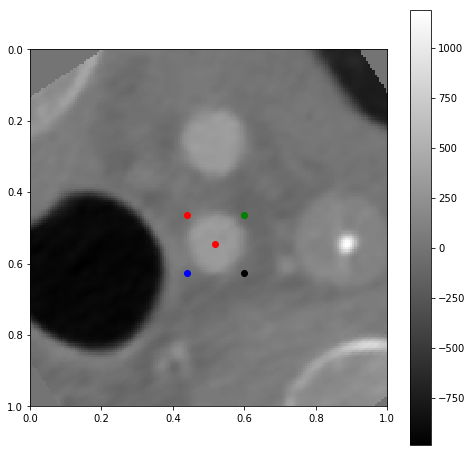

In [5]:
i = np.random.randint(N)
print(i)
x = X[i]

p = C[i][1]
print(p)
d = p[2]

plt.figure(figsize=(8,8))
plt.imshow(x,cmap='gray', extent=[0, 1, 1, 0])
plt.plot([p[0]],[p[1]],linestyle='',marker='o',color='r')

plt.plot([p[0]-d/4],[p[1]-d/4],linestyle='',marker='o',color='r')
plt.plot([p[0]+d/4],[p[1]-d/4],linestyle='',marker='o',color='g')
plt.plot([p[0]-d/4],[p[1]+d/4],linestyle='',marker='o',color='b')
plt.plot([p[0]+d/4],[p[1]+d/4],linestyle='',marker='o',color='k')

plt.colorbar()
plt.show()